# 911 Calls Project

This project analyzes 911 call data from <a href="https://www.kaggle.com/mchirico/montcoalert">Kaggle</a>. This data set is from Montgomery County, PA over the dates of December 10, 2015 to July 29, 2020.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('911.csv')
df.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1
663521,40.015046,-75.299674,HAVERFORD STATION RD & W MONTGOMERY AVE; LOWER...,19041.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:52:46,LOWER MERION,HAVERFORD STATION RD & W MONTGOMERY AVE,1


These are the top 5 zipcodes for 911 calls in Montgomery County.

In [3]:
df['zip'].value_counts().head()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

These are the top 5 townships for 911 calls in Montgomery County.

In [4]:
df['twp'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

There are 148 unique call titles in this set, meaning there are 148 different, specific reasons why people dialed 911.

In [5]:
df['title'].nunique()

148

In [6]:
df['Reason'] = df['title'].apply(lambda reas: reas.split(':')[0])

The most frequent reason 911 is dialed is for EMS services.

In [7]:
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

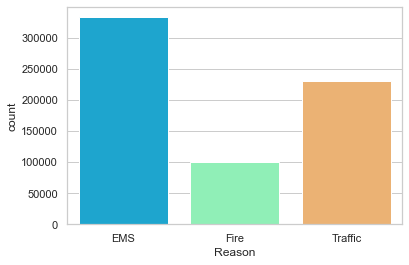

In [8]:
sns.set(style="whitegrid")
sns.countplot(x = df['Reason'], data = df, palette = 'rainbow')

In [9]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [10]:
df['Hour'] = df['timeStamp'].apply(lambda tst: tst.hour)
df['Month'] = df['timeStamp'].apply(lambda tst: tst.month)
df['Day of Week'] = df['timeStamp'].apply(lambda tst: tst.dayofweek)

In [11]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

This count plot shows the total 911 calls for each reason by day of the week. The fewest calls occur on Sundays and more calls occur on Fridays.

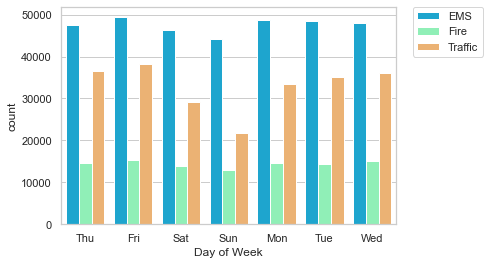

In [12]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='rainbow')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

This count plot shows the total 911 calls for each reason by month. The Fire Department sees a peak in calls in June. Traffic calls decline from July to September and then rise steadily through the end of the year. EMS has a similar pattern, with calls slowing from roughly June to November and then more calls the rest of the year.

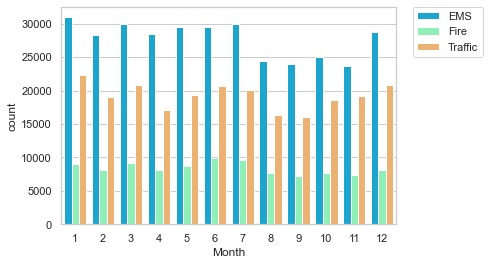

In [13]:
sns.countplot(x='Month',data=df,hue='Reason',palette='rainbow')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [14]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


In line with the previous plots, we see a drop in calls starting in June/July until November/December. We also see spikes around New Year, in March, and at the start of summer.

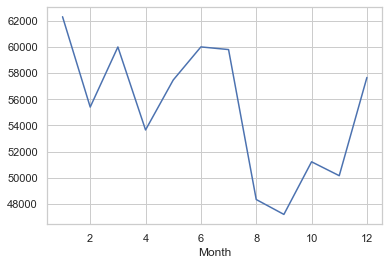

In [15]:
byMonth['twp'].plot()

Here we attempt a linear fit, but as we can see, the error is extremely high except from roughly April to June. However, this very roughly shows that there are generally fewer calls in the second half of the year and more calls in the first half.

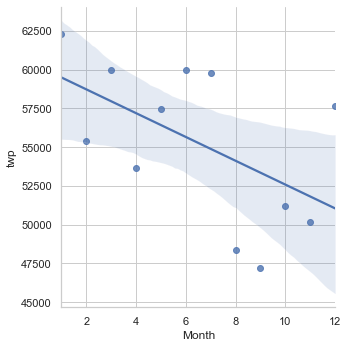

In [16]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [17]:
df['Date'] = df['timeStamp'].apply(lambda tst: tst.date())

Now we group by Date and see that there are certain dates that experience higher than average calls.

For example, there is a peak on March 2, 2018, which coincides with a <a href='https://patch.com/pennsylvania/yardley/pennsylvania-town-town-snow-totals-march-2-2018-noreaster'>Nor'easter</a> that occured in that region and most likely created poor driving conditions.

This happens again on November 15, 2018, where the region saw another <a href='https://www.inquirer.com/philly/news/snow-philadelphia-winter-sleet-latest-20181115.html'>heavy snowfall</a> which caused many car accidents as well.

On June 3, 2020, there is another peak in calls caused by <a href='https://philadelphia.cbslocal.com/2020/06/03/philadelphia-tornado-warning-derecho-severe-storms-three-people-dead-montgomery-county-hundreds-of-thousands-of-customers-without-power-region/'>high winds/tornado warning</a>.

In [18]:
df.groupby('Date').count()['twp'].head()

Date
2015-12-10    114
2015-12-11    391
2015-12-12    402
2015-12-13    316
2015-12-14    443
Name: twp, dtype: int64

In [19]:
import plotly
import cufflinks as cf
cf.go_offline()

In [20]:
df.groupby('Date').count()['twp'].iplot()

In line with the previous plot, we see spikes on the same dates as before, where weather conditions caused poor driving conditions and a rise in traffic incidents.

In [21]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].iplot()

We see that the Fire Department was also called for on March 2, 2018 and June 2, 2020, but oddly, not on November 15, 2018 as we might expect.

In [22]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].iplot()

EMS accounts for most of the calls to 911. Though the Fire Department and Traffic have sharp peaks, EMS is called most consistently. Excluding the peaks, Traffic calls average roughly around 100-150 per day in the date range specified. The Fire Department averages closer to 50 calls daily in the date range specified. EMS, in contrast, averages roughly 200 calls per day in the date range specified.

We also have two noticeable peaks on March 2, 2018 and August 13, 2018.

March 2, 2018 aligns with the Nor'easter as before, whereas the August 13, 2018 peak coincides with <a href='https://www.usatoday.com/story/weather/2018/08/13/pennsylvania-flooding-drenching-rain-wreaks-havoc-across-state/980889002/'>flooding</a> in the area.

In [23]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].iplot()

In [24]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


Using a heatmap, we can see correlations between frequency of calls by day of the week and hour of the day.

We see the highest number of calls on weekdays between 2:00PM and 6:00PM, but this heatmap seems to indicate a higher occurence of calls during work week hours. The calls begin occurring later in the mornings on weekends, with Saturday seeing a higher volume of calls than on Sunday. We also see that there are slightly more calls occurring later at night around midnight on Friday/Saturday and Saturday/Sunday.

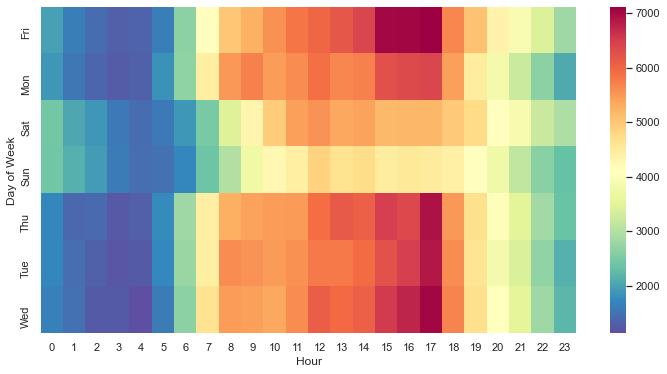

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='Spectral_r')

With this cluster map, we can see which days of the week and hours of the day are most closely correlated.

There is less activity at 3:00AM and 4:00AM consistently. 3:00PM to 5:00PM on Fridays are particularly eventful, but those hours have an increase in calls fairly consistently through the work week, perhaps due to rush hour. As before, we see higher rates of calls during the work week and during work hours. We can also note that lunch hour has consistently more calls as well.

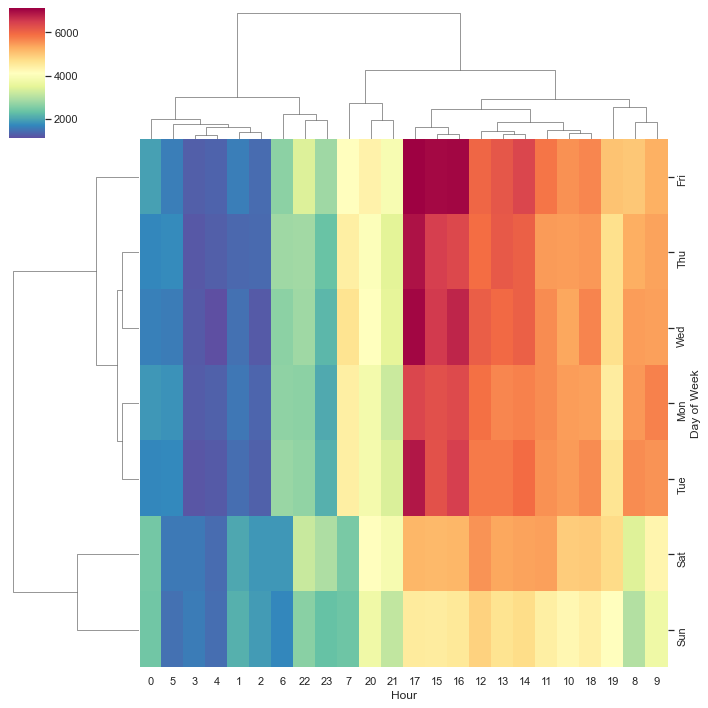

In [26]:
sns.clustermap(dayHour,cmap='Spectral_r')

In [27]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151


This heatmap shows correlations between frequency of calls by day of the week and month of the year.

Fridays in March seem to correlate to the highest volume of 911 calls, and Sundays in general, but more so in August and November, correlate to the lowest frequency of 911 calls. Again, we see that Saturdays and Sundays in general see fewer calls.

In the second half of the year, as seen in the first few plots, there are fewer calls than in the first half and last month of the year.

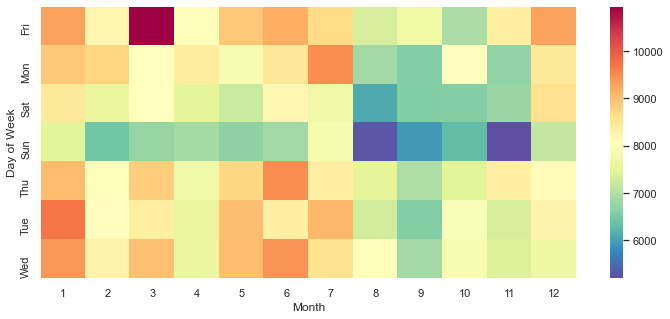

In [28]:
plt.figure(figsize=(12,5))
sns.heatmap(dayMonth,cmap='Spectral_r')

With this cluster map, we can see which days of the week and months of the year are most closely correlated.

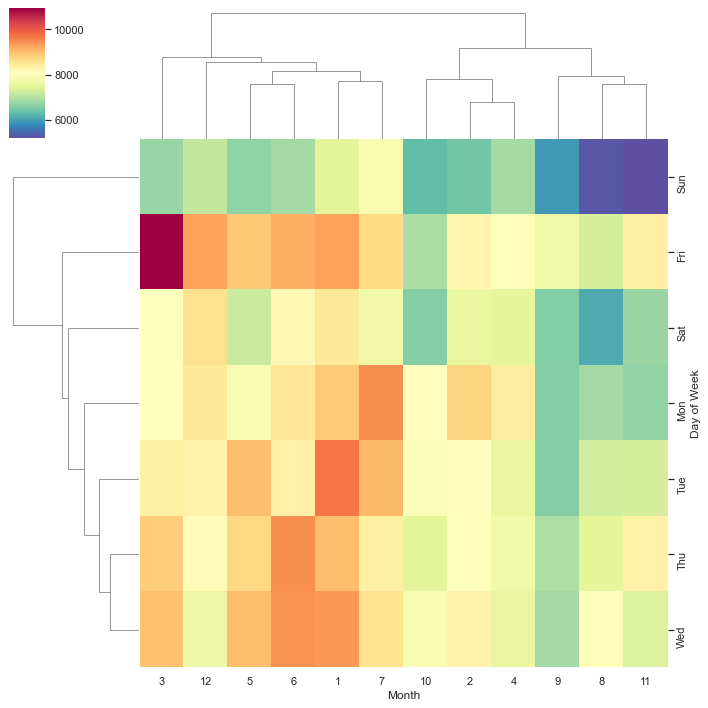

In [29]:
sns.clustermap(dayMonth,cmap='Spectral_r')